In [55]:
import numpy as np
import pandas as pd

from sklearn import datasets
iris=datasets.load_iris()
print ("feature names=",iris.feature_names)
print ("vector name=",iris.target_names)
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], 
                  columns= iris['feature_names'] + ['class'])
df.info()
df

feature names= ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
vector name= ['setosa' 'versicolor' 'virginica']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [50]:
x=iris.data[:,2:4]
y=iris.target

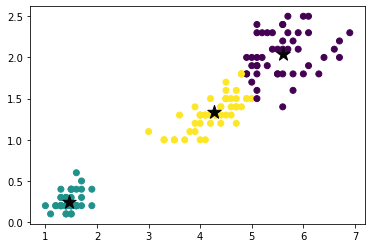

In [51]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=42)

kmeans_model.fit(x)

clusters=kmeans_model.labels_
centroids=kmeans_model.cluster_centers_

#Display scatter plots 
import numpy as np
from matplotlib import pyplot as plt
plt.scatter(x[:,0], x[:,1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1],marker='*', s=200, c='#050505')
plt.show()

k=1, SSE=26.103076447039722
k=2, SSE=16.469773740281195
k=3, SSE=15.089477089696558
k=4, SSE=15.0307321707491
k=5, SSE=14.858930749063735
k=6, SSE=14.883090350867239


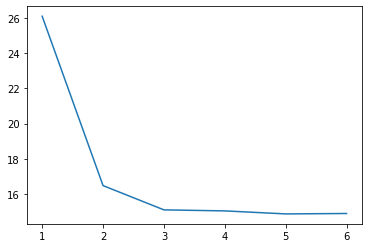

In [38]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt

iris = datasets.load_iris()
x = iris.data
y = iris.target


k_list = list(range(1, 7))
sse_list = [0] * len(k_list)

for k_ind, k in enumerate(k_list):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_

    sse = 0
    for i in range(k):
        cluster_i = np.where(clusters == i)

        sse += np.linalg.norm(x[cluster_i] - centroids[i])

    print('k={}, SSE={}'.format(k, sse))
    sse_list[k_ind] = sse



plt.plot(k_list, sse_list)
plt.show()
# it seems that k=3 is an optimal value